In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/azamkhan/anaconda3/envs/nasa/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
prediction_outputs_dir = "../ml_prediction_outputs"

climate_models = ["GFDL-ESM", "IPSL-CM6A-LR", "MPI-ESM1-2-HR", "MRI-ESM2-0"]
scenarios = ["HighEmission", "LowEmission"]
targets = ['Nitrate', 'Phosphate', 'Sediments']

historical_period = "1990-2019"
future_period = "2030-2059"

def read_csvs():
    dfs = []
    for model in climate_models:
        for scenario in scenarios:
            for target in targets:
                file_path = os.path.join(prediction_outputs_dir, f"{model}/{scenario}/{target}_raw_predictions.csv")
                df = pd.read_csv(file_path)
                df["Model"] = model
                df["Scenario"] = scenario
                df["Target"] = target
                dfs.append(df)
    return pd.concat(dfs)
                

In [4]:
dfs = read_csvs()

In [5]:
dfs

,Date,Predicted,Model,Scenario,Target
0,1985-01-08 00:00:00+00:00,931.173700,GFDL-ESM,HighEmission,Nitrate
1,1985-01-09 00:00:00+00:00,718.164900,GFDL-ESM,HighEmission,Nitrate
2,1985-01-10 00:00:00+00:00,509.491900,GFDL-ESM,HighEmission,Nitrate
3,1985-01-11 00:00:00+00:00,620.849240,GFDL-ESM,HighEmission,Nitrate
4,1985-01-12 00:00:00+00:00,871.471200,GFDL-ESM,HighEmission,Nitrate
...,...,...,...,...,...
28477,2062-12-27 00:00:00+00:00,1.069305,MRI-ESM2-0,LowEmission,Sediments
28478,2062-12-28 00:00:00+00:00,8.166685,MRI-ESM2-0,LowEmission,Sediments
28479,2062-12-29 00:00:00+00:00,-0.172220,MRI-ESM2-0,LowEmission,Sediments
28480,2062-12-30 00:00:00+00:00,0.722212,MRI-ESM2-0,LowEmission,Sediments


In [6]:
historical_period_start_date = '1987-01-01'
historical_period_end_date = '2019-12-31'

future_period_start_date = '2030-01-01'
future_period_end_date = '2062-12-31'

dfs["Date"] = pd.to_datetime(dfs["Date"])

historical_data = dfs[(dfs["Date"] >= historical_period_start_date) & (dfs["Date"] <= historical_period_end_date)]
future_data = dfs[(dfs["Date"] >= future_period_start_date) & (dfs["Date"] <= future_period_end_date)]

In [7]:
historical_data['month'] = historical_data['Date'].dt.to_period('M')
historical_data_monthly = (
    historical_data.groupby(['month', 'Model', 'Scenario', 'Target'])['Predicted'].agg(
        'sum'
    ).reset_index()
)

future_data["month"] = future_data["Date"].dt.to_period("M")
future_data_monthly = (
    future_data.groupby(["month", "Model", "Scenario", "Target"])["Predicted"]
    .agg("sum")
    .reset_index()
)


/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/3200810665.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  historical_data['month'] = historical_data['Date'].dt.to_period('M')
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/3200810665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_data['month'] = historical_data['Date'].dt.to_period('M')
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/3200810665.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  future_data["month"] = future_data["Date"].dt.to_period("M")
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/3200810665.p

In [9]:
# take model ensemble mean

historical_data.drop(columns=["Model"], inplace=True)
historical_data_ensemble = (
    historical_data.groupby(["Scenario", "Target", "Date"]).mean().reset_index()
)
future_data.drop(columns=["Model"], inplace=True)
future_data_ensemble = (
    future_data.groupby(["Scenario", "Target", "Date"]).mean().reset_index()
)


/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/2935508526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_data.drop(columns=["Model"], inplace=True)
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/2935508526.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_data.drop(columns=["Model"], inplace=True)


In [10]:
historical_data_ensemble["month"] = historical_data_ensemble["Date"].dt.to_period("M")
historical_data_ensemble_monthly = (
    historical_data_ensemble.groupby(["month", "Scenario", "Target"])["Predicted"]
    .agg("sum")
    .reset_index()
)

future_data_ensemble["month"] = future_data_ensemble["Date"].dt.to_period("M")
future_data_ensemble_monthly = (
    future_data_ensemble.groupby(["month", "Scenario", "Target"])["Predicted"]
    .agg("sum")
    .reset_index()
)


/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/32058385.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  historical_data_ensemble["month"] = historical_data_ensemble["Date"].dt.to_period("M")
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/32058385.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  future_data_ensemble["month"] = future_data_ensemble["Date"].dt.to_period("M")


In [11]:
historical_data_ensemble_monthly


,month,Scenario,Target,Predicted
0,1987-01,HighEmission,Nitrate,51358.790900
1,1987-01,HighEmission,Phosphate,1467.878917
2,1987-01,HighEmission,Sediments,3705.510422
3,1987-01,LowEmission,Nitrate,51317.982040
4,1987-01,LowEmission,Phosphate,1467.378670
...,...,...,...,...
2371,2019-12,HighEmission,Phosphate,1619.288174
2372,2019-12,HighEmission,Sediments,1044.954944
2373,2019-12,LowEmission,Nitrate,50035.095755
2374,2019-12,LowEmission,Phosphate,1732.487459


In [12]:
historical_data_ensemble_monthly.rename(columns={'month': 'Date'}, inplace=True)
future_data_ensemble_monthly.rename(columns={'month': 'Date'}, inplace=True)

In [13]:
future_data_ensemble_monthly

nitrate_future_data_ensemble_monthly = future_data_ensemble_monthly[future_data_ensemble_monthly["Target"] == "Nitrate"]


In [14]:
nitrate_future_data_ensemble_monthly_he = nitrate_future_data_ensemble_monthly[nitrate_future_data_ensemble_monthly["Scenario"] == "HighEmission"]
nitrate_future_data_ensemble_monthly_he.drop(columns=["Scenario", "Target"], inplace=True)
nitrate_future_data_ensemble_monthly_he['month'] = nitrate_future_data_ensemble_monthly_he['Date'].dt.month



/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/1064167162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nitrate_future_data_ensemble_monthly_he.drop(columns=["Scenario", "Target"], inplace=True)
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/1064167162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nitrate_future_data_ensemble_monthly_he['month'] = nitrate_future_data_ensemble_monthly_he['Date'].dt.month


In [15]:
wq_monthly_avg = (
    nitrate_future_data_ensemble_monthly_he[["Predicted", "month"]]
    .groupby("month")
    .mean()
    .reset_index()
)


In [16]:
wq_monthly_avg


,month,Predicted
0,1,67372.036429
1,2,66165.555339
2,3,73770.115484
3,4,43523.260007
4,5,18621.381366
5,6,11670.479518
6,7,10696.186172
7,8,7560.956992
8,9,7254.302197
9,10,10306.324331


In [17]:
wq_monthly_avg


,month,Predicted
0,1,67372.036429
1,2,66165.555339
2,3,73770.115484
3,4,43523.260007
4,5,18621.381366
5,6,11670.479518
6,7,10696.186172
7,8,7560.956992
8,9,7254.302197
9,10,10306.324331


In [18]:
nitrate_future_data_ensemble_monthly_he


,Date,Predicted,month
0,2030-01,66608.123247,1
6,2030-02,62893.537635,2
12,2030-03,59566.964152,3
18,2030-04,45903.592805,4
24,2030-05,24139.113410,5
...,...,...,...
2346,2062-08,9907.886596,8
2352,2062-09,7496.296280,9
2358,2062-10,13158.453937,10
2364,2062-11,28413.135079,11


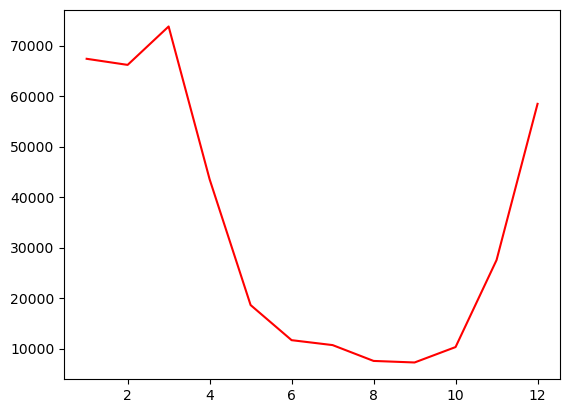

In [19]:
plt.plot(
    wq_monthly_avg["month"],
    wq_monthly_avg["Predicted"],
    color="red",
    label="Nitrate",
)


In [20]:
future_data_ensemble_monthly

,Date,Scenario,Target,Predicted
0,2030-01,HighEmission,Nitrate,66608.123247
1,2030-01,HighEmission,Phosphate,2151.180142
2,2030-01,HighEmission,Sediments,2318.390813
3,2030-01,LowEmission,Nitrate,65062.098608
4,2030-01,LowEmission,Phosphate,2531.884484
...,...,...,...,...
2371,2062-12,HighEmission,Phosphate,2434.262934
2372,2062-12,HighEmission,Sediments,6527.065291
2373,2062-12,LowEmission,Nitrate,63294.367165
2374,2062-12,LowEmission,Phosphate,2135.125227


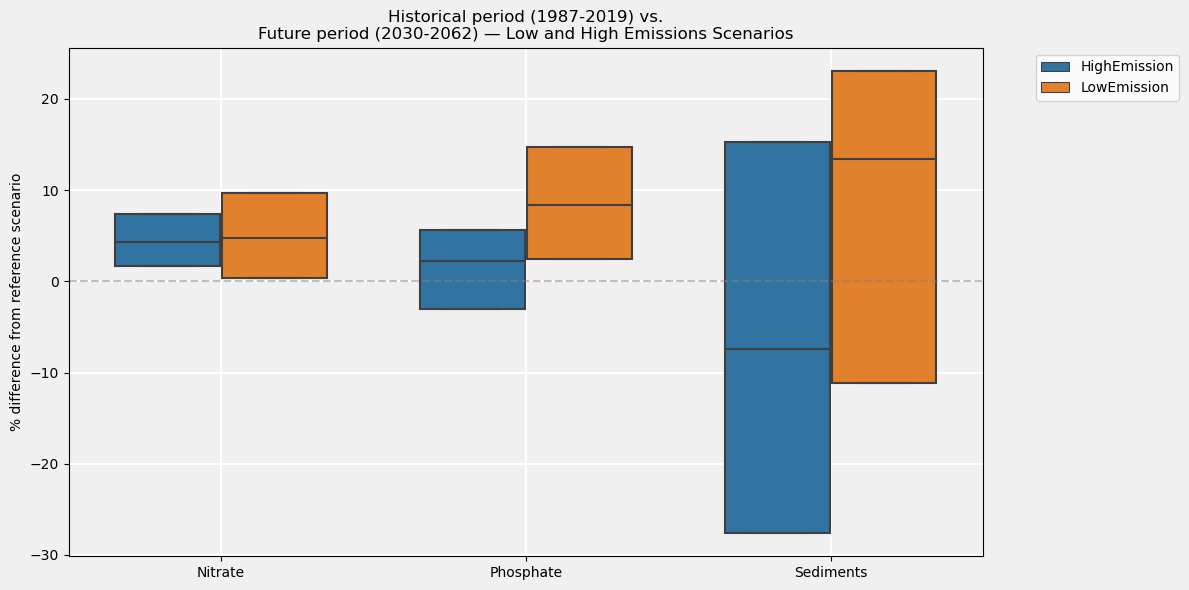


Annual Average Differences:
   Target     Scenario  Pct_Difference
  Nitrate HighEmission            4.35
  Nitrate  LowEmission            4.88
Phosphate HighEmission            2.27
Phosphate  LowEmission            8.44
Sediments HighEmission           -3.58
Sediments  LowEmission           10.64


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_annual_comparison(future_data, historical_data):
    """
    Create a comparison plot showing annual average differences from historical reference.
    """
    # Convert the date column to datetime if it's not already
    future_data["Date"] = pd.to_datetime(future_data["Date"])
    historical_data["Date"] = pd.to_datetime(historical_data["Date"])

    # Extract the year from the date column
    future_data["Year"] = future_data["Date"].dt.year
    historical_data["Year"] = historical_data["Date"].dt.year

    # Calculate reference values from historical data (annual means)
    historical_annual_means = (
        historical_data.groupby(["Target", "Year"])["Predicted"].mean().reset_index()
    )
    historical_means = historical_annual_means.groupby("Target")["Predicted"].mean()

    # Calculate annual means for future data
    future_annual_means = (
        future_data.groupby(["Target", "Scenario", "Year"])["Predicted"]
        .mean()
        .reset_index()
    )

    # Calculate percentage differences for future data
    future_annual_means["Pct_Difference"] = future_annual_means.apply(
        lambda row: (
            (row["Predicted"] - historical_means[row["Target"]])
            / historical_means[row["Target"]]
            * 100
        ),
        axis=1,
    )

    # Set up the plot
    plt.figure(figsize=(12, 6))

    # Create the boxplot
    ax = plt.gca()
    sns.boxplot(
        x="Target",
        y="Pct_Difference",
        hue="Scenario",
        data=future_annual_means,
        width=0.7,
        ax=ax,
        showfliers=False,
        whis=0
    )

    # Customize the plot
    plt.title(
        "Historical period (1987-2019) vs.\nFuture period (2030-2062) — Low and High Emissions Scenarios"
    )
    plt.ylabel("% difference from reference scenario")
    plt.xlabel("")

    # Set background color and grid
    ax.set_facecolor("#f0f0f0")
    plt.grid(True, color="white", linestyle="-", linewidth=1.5)
    ax.set_axisbelow(True)
    plt.gca().patch.set_facecolor("#f0f0f0")
    plt.gcf().patch.set_facecolor("#f0f0f0")

    # Add horizontal line at 0%
    plt.axhline(y=0, color="gray", linestyle="--", alpha=0.5)

    # Adjust legend position and layout
    plt.legend(title="", bbox_to_anchor=(1.05, 1), loc="upper left")

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    plt.show()

    # Print average values for verification
    print("\nAnnual Average Differences:")
    print(
        future_annual_means.groupby(["Target", "Scenario"])["Pct_Difference"]
        .mean()
        .reset_index()
        .round(2)
        .to_string(index=False)
    )
    return future_annual_means


# Usage
fut = plot_annual_comparison(future_data_ensemble, historical_data_ensemble)


/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/2989162623.py:10: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(future_data["Date"]):
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/2989162623.py:16: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(historical_data["Date"]):


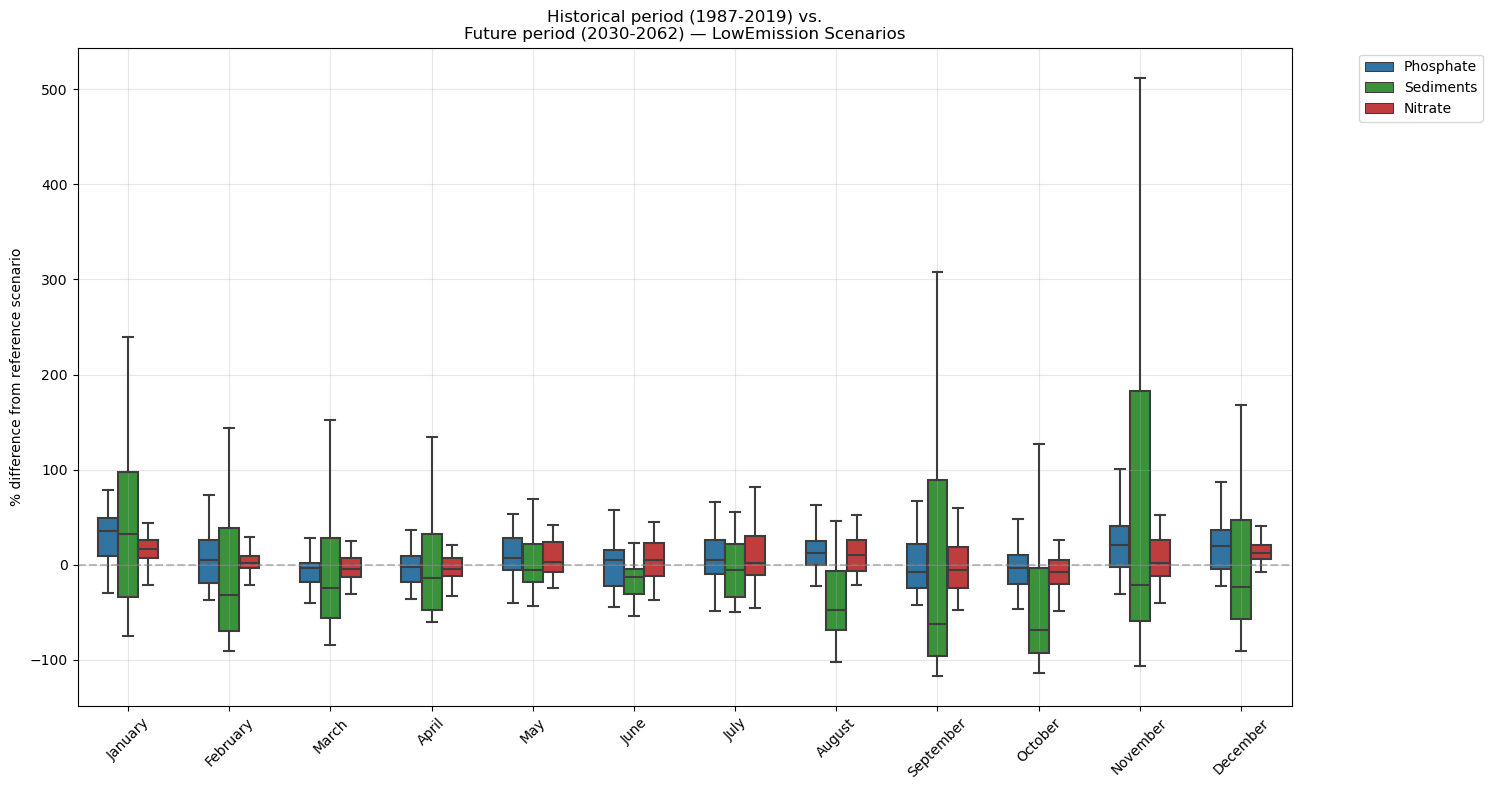

/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/2989162623.py:10: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(future_data["Date"]):
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/2989162623.py:16: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(historical_data["Date"]):


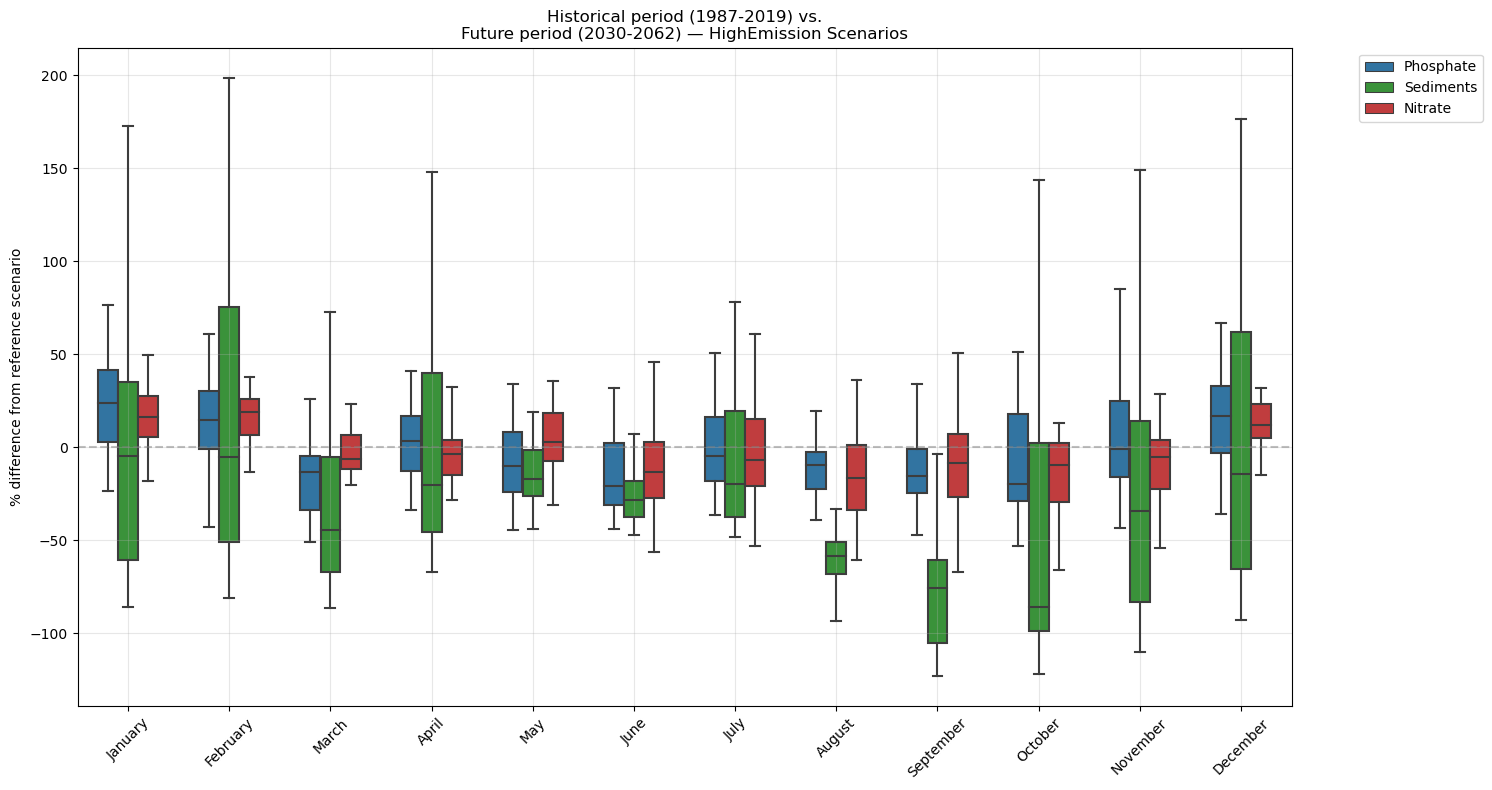

In [22]:
def plot_monthly_comparison(
    future_data, historical_data, emission_scenario="LowEmission"
):
    """
    Create a monthly comparison plot showing differences from historical reference for all targets.
    """
    # Extract month from the Date column
    future_data = future_data.copy()
    future_data = future_data[future_data["Scenario"] == emission_scenario]
    if pd.api.types.is_period_dtype(future_data["Date"]):
        future_data["Date"] = future_data["Date"].dt.to_timestamp()
    future_data["Month"] = pd.to_datetime(future_data["Date"]).dt.strftime("%B")

    # Calculate reference values from historical data
    historical_data = historical_data.copy()
    if pd.api.types.is_period_dtype(historical_data["Date"]):
        historical_data["Date"] = historical_data["Date"].dt.to_timestamp()
    historical_data["Month"] = pd.to_datetime(historical_data["Date"]).dt.strftime("%B")
    reference_values = (
        historical_data.groupby(["Target", "Month"])["Predicted"].mean().reset_index()
    )

    # Merge with future data and calculate differences
    future_merged = future_data.merge(
        reference_values, on=["Target", "Month"], suffixes=("_future", "_historical")
    )
    future_merged["Pct_Difference"] = (
        (future_merged["Predicted_future"] - future_merged["Predicted_historical"])
        / future_merged["Predicted_historical"]
        * 100
    )

    # Set up the plot
    plt.figure(figsize=(15, 8))

    # Create month order
    month_order = [
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ]

    # Define the target order and corresponding colors using sns.color_palette("tab10")
    target_order = ["Phosphate", "Sediments", "Nitrate"]
    tab10_palette = sns.color_palette("tab10")
    target_colors = {
        "Phosphate": tab10_palette[0],  # Blue
        "Sediments": tab10_palette[2],  # Orange
        "Nitrate": tab10_palette[3],  # Green
    }

    # Create the boxplot
    sns.boxplot(
        x="Month",
        y="Pct_Difference",
        hue="Target",
        data=future_merged,
        order=month_order,
        hue_order=target_order,  # Ensure the targets appear in the desired order
        palette=target_colors,  # Assign specific colors to each target
        width=0.6,
        showfliers=False,
        # whis=0,

    )

    # Customize the plot
    plt.title(
        f"Historical period (1987-2019) vs.\nFuture period (2030-2062) — {emission_scenario} Scenarios"
    )
    plt.ylabel("% difference from reference scenario")
    plt.xlabel("")

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha="center")

    # Add horizontal line at 0%
    plt.axhline(y=0, color="gray", linestyle="--", alpha=0.5)

    # Adjust legend position and layout
    plt.legend(title="", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, alpha=0.3)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    plt.show()

    return future_merged


# Usage
le = plot_monthly_comparison(future_data_ensemble_monthly, 
historical_data_ensemble_monthly, emission_scenario="LowEmission")
he = plot_monthly_comparison(
    future_data_ensemble_monthly,
    
    historical_data_ensemble_monthly,
    emission_scenario="HighEmission",
)


# SWAT ANALYSES

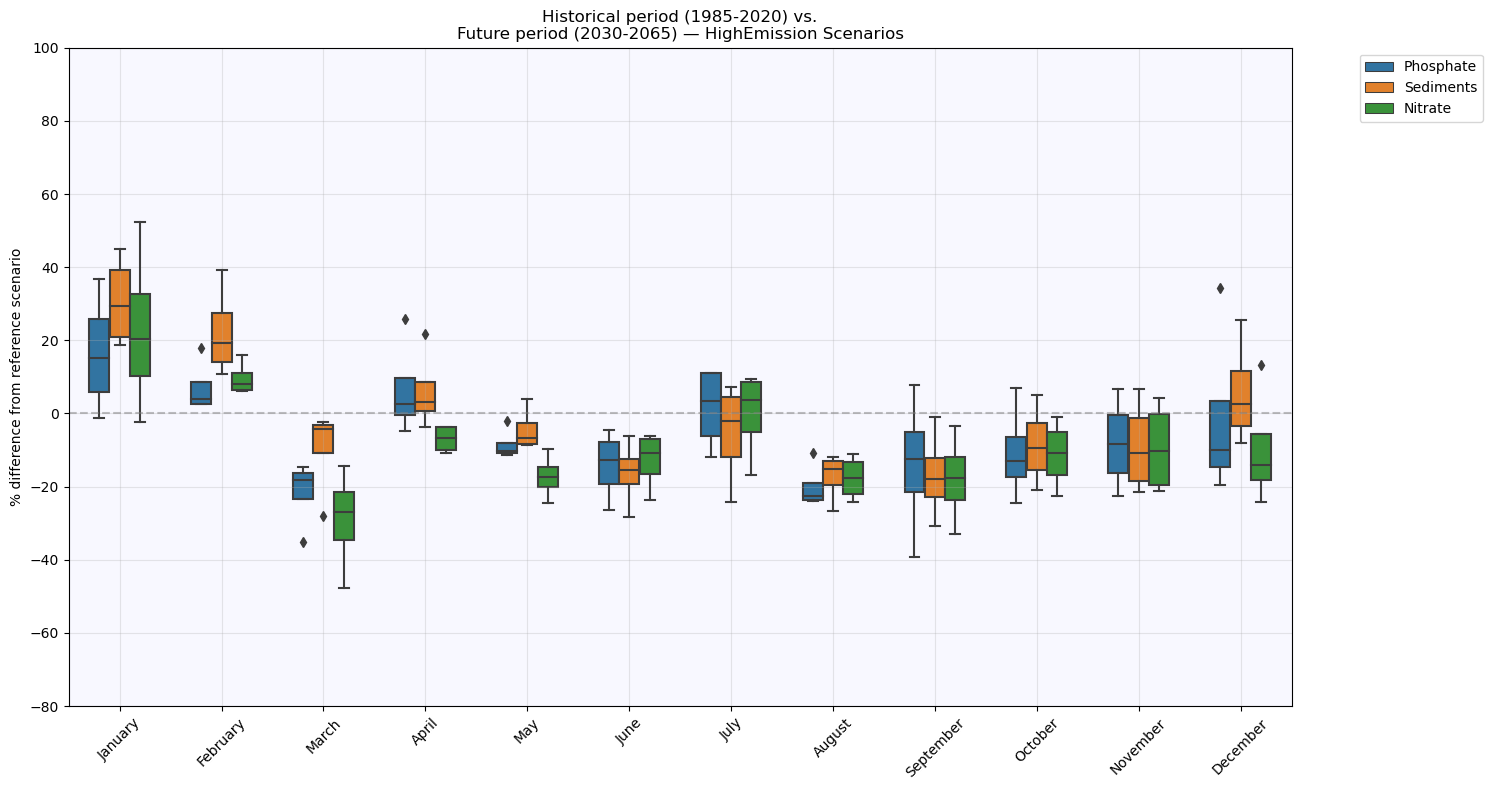

In [23]:
swat_df = pd.read_csv("SeasonalOutputsssp370.csv")
swat_df.rename(columns={"variable": "Month", "value": 'percent_diff_from_ref_scenario'}, inplace=True)
# drop values where treatment equals "Streamflow"
swat_df = swat_df[swat_df["treatment"] != "Streamflow"]

month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

# plot box plot
plt.figure(figsize=(15, 8))

# hue treatment mapping to color
treatment_color_mapping  = {
    "Phosphate": "lightblue",
    "Sediments": "green",
    "Nitrate": "red",
    # "Streamflow": "purple",
}

sns.boxplot(
    x="Month",
    y="percent_diff_from_ref_scenario",
    hue="treatment",
    data=swat_df,
    order=month_order,
    hue_order=["Phosphate", "Sediments", "Nitrate"],#, "Streamflow"],
    width=0.6,
    palette=sns.color_palette("tab10")
)

plt.title("Historical period (1985-2020) vs.\nFuture period (2030-2065) — HighEmission Scenarios")
plt.ylabel("% difference from reference scenario")
plt.xlabel("")
plt.xticks(rotation=45, ha="center")
plt.axhline(y=0, color="gray", linestyle="--", alpha=0.5)
plt.legend(title="", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)

# Set background color to sky blue
ax = plt.gca()
ax.set_facecolor("ghostwhite")
# plt.gcf().patch.set_facecolor("skyblue")

# Set y-axis limits
plt.ylim(-80, 100)

plt.tight_layout()
plt.show()

## Correlation Analysis

In [24]:
le_percent_diff = le[["Month", "Target", "Pct_Difference"]]
le_percent_diff.rename(
    columns={"Pct_Difference": "percent_diff_from_ref_scenario", "Target": "treatment"},
    inplace=True,
)
# sort by january to december in month column then by treatment
le_percent_diff["Month"] = pd.Categorical(
    le_percent_diff["Month"], categories=month_order, ordered=True
)
le_percent_diff.sort_values(by=["Month", "treatment"], inplace=True)


he_percent_diff = he[["Month", "Target", "Pct_Difference"]]
he_percent_diff.rename(
    columns={"Pct_Difference": "percent_diff_from_ref_scenario", "Target": "treatment"},
    inplace=True,
)
# sort by january to december in month column then by treatment
he_percent_diff["Month"] = pd.Categorical(
    he_percent_diff["Month"], categories=month_order, ordered=True
)
he_percent_diff.sort_values(by=["Month", "treatment"], inplace=True)


/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/3943252436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le_percent_diff.rename(
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/3943252436.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le_percent_diff["Month"] = pd.Categorical(
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/3943252436.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [26]:
le_percent_diff['Source'] = 'ML'
he_percent_diff['Source'] = 'ML'
swat_df['Source'] = 'SWAT'

/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/3139005938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le_percent_diff['Source'] = 'ML'
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_55514/3139005938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  he_percent_diff['Source'] = 'ML'


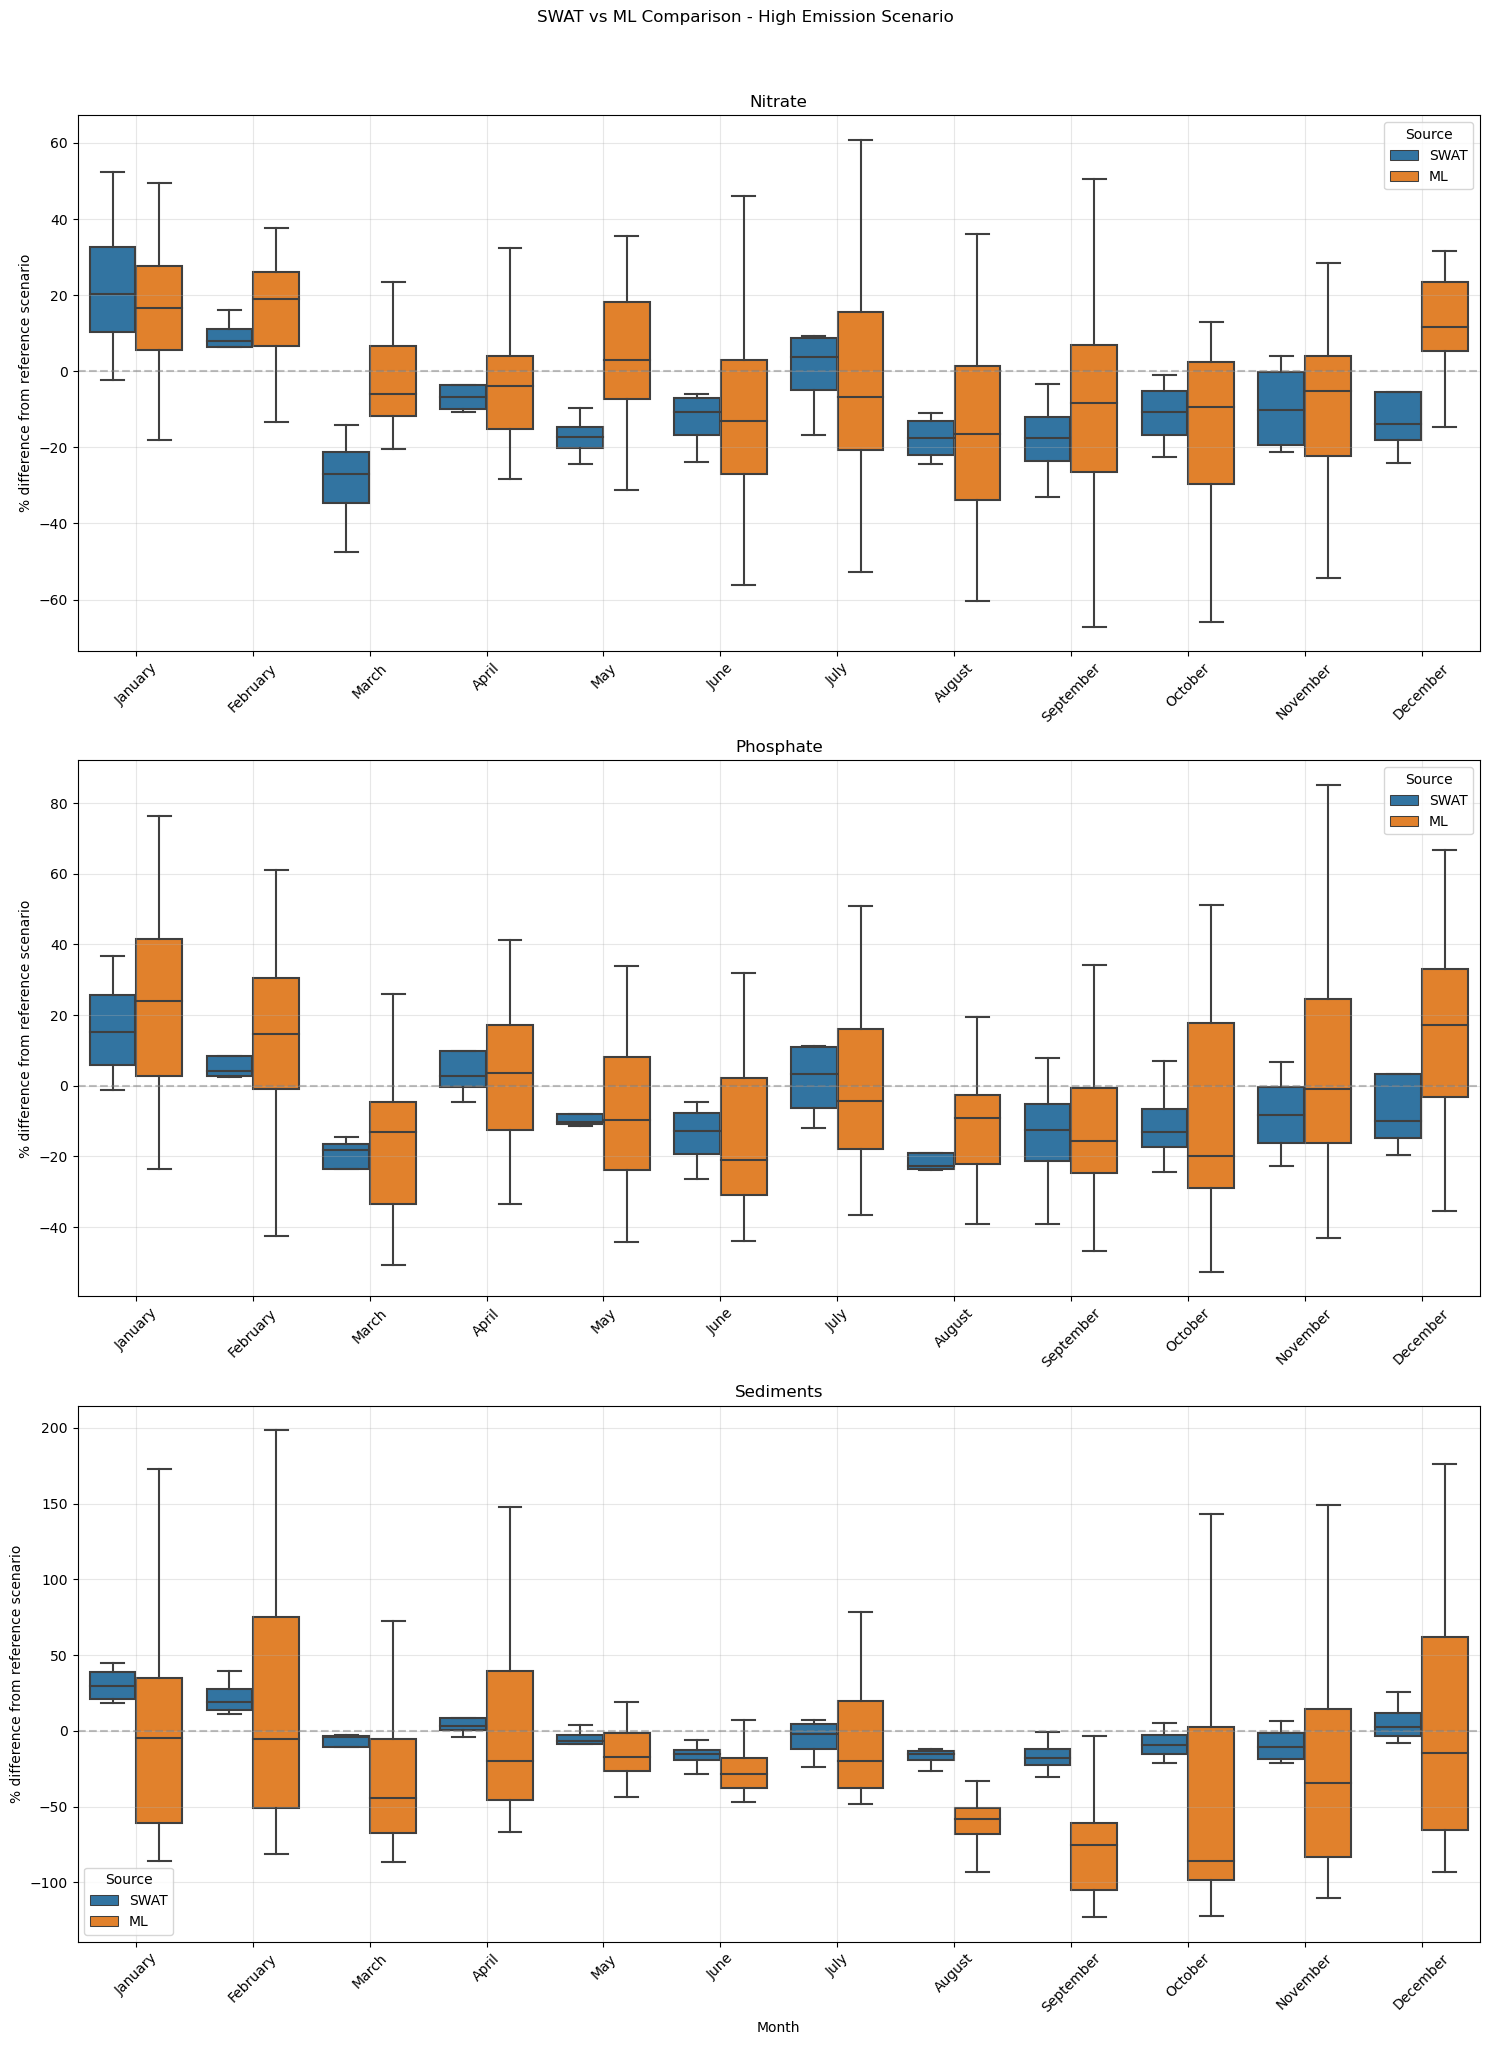

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20))

# Plot for Nitrate
sns.boxplot(
    data=pd.concat(
        [
            swat_df[swat_df["treatment"] == "Nitrate"],
            he_percent_diff[he_percent_diff["treatment"] == "Nitrate"],
        ]
    ),
    x="Month",
    y="percent_diff_from_ref_scenario",
    hue="Source",
    order=month_order,
    showfliers=False,
    ax=ax1,
)
ax1.set_title("Nitrate")
ax1.set_xlabel("")
ax1.axhline(y=0, color="gray", linestyle="--", alpha=0.5)

# Plot for Phosphate
sns.boxplot(
    data=pd.concat(
        [
            swat_df[swat_df["treatment"] == "Phosphate"],
            he_percent_diff[he_percent_diff["treatment"] == "Phosphate"],
        ]
    ),
    x="Month",
    y="percent_diff_from_ref_scenario",
    hue="Source",
    order=month_order,
    showfliers=False,
    ax=ax2,
)
ax2.set_title("Phosphate")
ax2.set_xlabel("")
ax2.axhline(y=0, color="gray", linestyle="--", alpha=0.5)

# Plot for Sediments
sns.boxplot(
    data=pd.concat(
        [
            swat_df[swat_df["treatment"] == "Sediments"],
            he_percent_diff[he_percent_diff["treatment"] == "Sediments"],
        ]
    ),
    x="Month",
    y="percent_diff_from_ref_scenario",
    hue="Source",
    order=month_order,
    showfliers=False,
    ax=ax3,
)
ax3.set_title("Sediments")
ax3.set_xlabel("Month")
ax3.axhline(y=0, color="gray", linestyle="--", alpha=0.5)

# Rotate x-axis labels for better readability
for ax in [ax1, ax2, ax3]:
    ax.tick_params(axis="x", rotation=45)
    ax.set_ylabel("% difference from reference scenario")
    ax.grid(True, alpha=0.3)

plt.suptitle("SWAT vs ML Comparison - High Emission Scenario", y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
stop here

# SHAP ANALYSIS

In [ ]:
import shap
import matplotlib.pyplot as plt
import mlflow
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

run_id_model_mapping = {
    "Sediments DlyLd(kg*1000)": "aca74d448f6341a89383c29b619e95f2",
    "Nitrate DlyLd(kg)": "3c4dad19956845c08cc9f42fa0f1ccce",
    "Phosphate DlyLd(kg)": "6324bf50aac8455a8ed5ff0fd94edfba",
    "TotalP": "eba56c3696474d3ab7d698e9e2c01b34",
}


# load shap values
prediction_outputs_dir = "../ml_prediction_outputs"

climate_models = ["GFDL-ESM", "IPSL-CM6A-LR", "MPI-ESM1-2-HR", "MRI-ESM2-0"]
scenarios = ["HighEmission", "LowEmission"]
targets = ["Nitrate", "Phosphate", "Sediments", "TotalP"]

historical_period = "1990-2019"
future_period = "2030-2059"


def read_csvs_shap():
    dfs = {model: {scenario: {} for scenario in scenarios} for model in climate_models}
    for model in climate_models:
        for scenario in scenarios:
            for target in targets:
                file_path = os.path.join(
                    prediction_outputs_dir,
                    f"{model}/{scenario}/shap_values/{target}_shap_values.csv",
                )
                df = pd.read_csv(file_path)
                df["Model"] = model
                df["Scenario"] = scenario
                df["Target"] = target
                # make these the first three columns
                cols = df.columns.tolist()
                cols = cols[-3:] + cols[:-3]
                df = df[cols]
                
                dfs[model][scenario][target] = df
    return dfs

In [ ]:
shap_dfs = read_csvs_shap()

In [ ]:
# function to load average shap dataframe for a given model, scenario and target
def load_average_shap_df(scenario, target):
    shap_df1 = shap_dfs["GFDL-ESM"][scenario][target]
    shap_df2 = shap_dfs["IPSL-CM6A-LR"][scenario][target]
    shap_df3 = shap_dfs["MPI-ESM1-2-HR"][scenario][target]
    shap_df4 = shap_dfs["MRI-ESM2-0"][scenario][target]

    average_shap_df = (
        pd.concat(
            [
                shap_df1,
                shap_df2,
                shap_df3,
                shap_df4,
            ]
        )
        .groupby(level=0)
        .mean()
    )
    return average_shap_df
    

def load_ensemble_target_df(scenario, target):
    df1 = dfs[
        (dfs["Model"] == "GFDL-ESM")
        & (dfs["Scenario"] == scenario)
        & (dfs["Target"] == target)
    ]
    df2 = dfs[
        (dfs["Model"] == "IPSL-CM6A-LR")
        & (dfs["Scenario"] == scenario)
        & (dfs["Target"] == target)
    ]
    df3 = dfs[
        (dfs["Model"] == "MPI-ESM1-2-HR")
        & (dfs["Scenario"] == scenario)
        & (dfs["Target"] == target)
    ]
    df4 = dfs[
        (dfs["Model"] == "MRI-ESM2-0")
        & (dfs["Scenario"] == scenario)
        & (dfs["Target"] == target)
    ]
    ensemble_df = pd.concat([df1, df2, df3, df4])


    ensemble_df["Date"] = pd.to_datetime(ensemble_df["Date"])
    ensemble_df = ensemble_df.groupby("Date").mean().reset_index()
    return ensemble_df


In [ ]:
import json
shap.initjs()

run_id_model_mapping = {
    "Sediments": "aca74d448f6341a89383c29b619e95f2",
    "Nitrate": "3c4dad19956845c08cc9f42fa0f1ccce",
    "Phosphate": "6324bf50aac8455a8ed5ff0fd94edfba",
    "TotalP": "eba56c3696474d3ab7d698e9e2c01b34",
}

def select_features(target, run_id_model_mapping):
    run_id = run_id_model_mapping[target]
    artifact_path = f"{target.split(' ')[0]}_rf_input_features.json"
    local_path = mlflow.artifacts.download_artifacts(
        run_id=run_id, artifact_path=artifact_path
    )
    with open(local_path, "r") as f:
        loaded_dict = json.load(f)
    return loaded_dict["input_features"]

def get_shap_analysis(scenario, target):
    shap_df = load_average_shap_df(scenario, target)
    target_df = load_ensemble_target_df(scenario, target)
    features = select_features(target, run_id_model_mapping)
    shap_df.rename(columns={"DOY_cos": "Month_cos"}, inplace=True)
    features.remove("DOY_cos")
    features.append("Month_cos")
    # shap_values = shap_df[features]
    return shap_df, target_df, features

def explain_prediction(scenario, target, date):
    shap_values, target_df, features = get_shap_analysis(scenario, target)
    date_index = target_df[target_df["Date"] == date].index[0]
    return shap.force_plot(
        shap_values.iloc[date_index]["bv"],
        shap_values[features].iloc[date_index].values,
        feature_names=features,
    )


In [ ]:
nitrate_LE_shap, nitrate_LE_ensemble, nitrate_features = get_shap_analysis("LowEmission", "Nitrate")

/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_51192/571335109.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_51192/571335109.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ensemble_df = ensemble_df.groupby("Date").mean().reset_index()


In [ ]:
explain_prediction("LowEmission", "Nitrate", "2045-07-03")

/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_51192/571335109.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_51192/571335109.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ensemble_df = ensemble_df.groupby("Date").mean().reset_index()


/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_51192/571335109.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_51192/571335109.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ensemble_df = ensemble_df.groupby("Date").mean().reset_index()


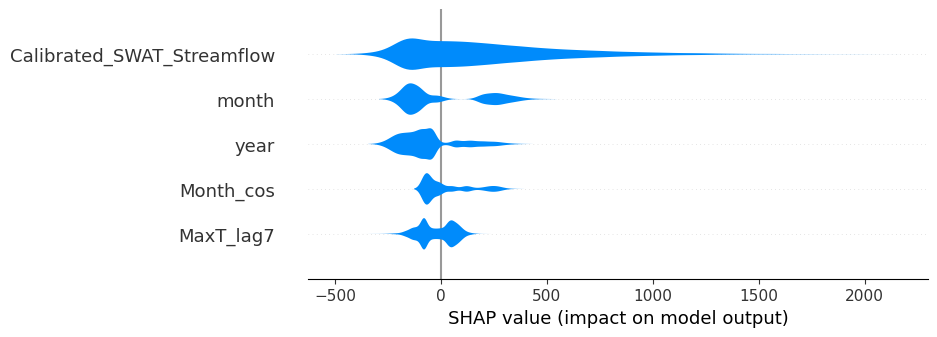

In [ ]:
nitrate_LE_shap, nitrate_LE_ensemble, nitrate_features = get_shap_analysis(
    "LowEmission", "Nitrate"
)
shap.plots.violin(nitrate_LE_shap[nitrate_features].to_numpy(), feature_names=nitrate_features,max_display=5, show=False)

In [ ]:
nitrate_LE_ensemble_jfm = nitrate_LE_ensemble[(nitrate_LE_ensemble["Date"].dt.month == 1) | (nitrate_LE_ensemble["Date"].dt.month == 2) | (nitrate_LE_ensemble["Date"].dt.month == 3)]
indices_jfm = nitrate_LE_ensemble_jfm.index
nitrate_shap_le_jfm = nitrate_LE_shap.iloc[indices_jfm]

nitrate_LE_ensemble_amj = nitrate_LE_ensemble[(nitrate_LE_ensemble["Date"].dt.month == 4) | (nitrate_LE_ensemble["Date"].dt.month == 5) | (nitrate_LE_ensemble["Date"].dt.month == 6)]
indices_amj = nitrate_LE_ensemble_amj.index
nitrate_shap_le_amj = nitrate_LE_shap.iloc[indices_amj]

nitrate_LE_ensemble_jas = nitrate_LE_ensemble[(nitrate_LE_ensemble["Date"].dt.month == 7) | (nitrate_LE_ensemble["Date"].dt.month == 8) | (nitrate_LE_ensemble["Date"].dt.month == 9)]
indices_jas = nitrate_LE_ensemble_jas.index
nitrate_shap_le_jas = nitrate_LE_shap.iloc[indices_jas]

nitrate_LE_ensemble_ond = nitrate_LE_ensemble[(nitrate_LE_ensemble["Date"].dt.month == 10) | (nitrate_LE_ensemble["Date"].dt.month == 11) | (nitrate_LE_ensemble["Date"].dt.month == 12)]
indices_ond = nitrate_LE_ensemble_ond.index
nitrate_shap_le_ond = nitrate_LE_shap.iloc[indices_ond]


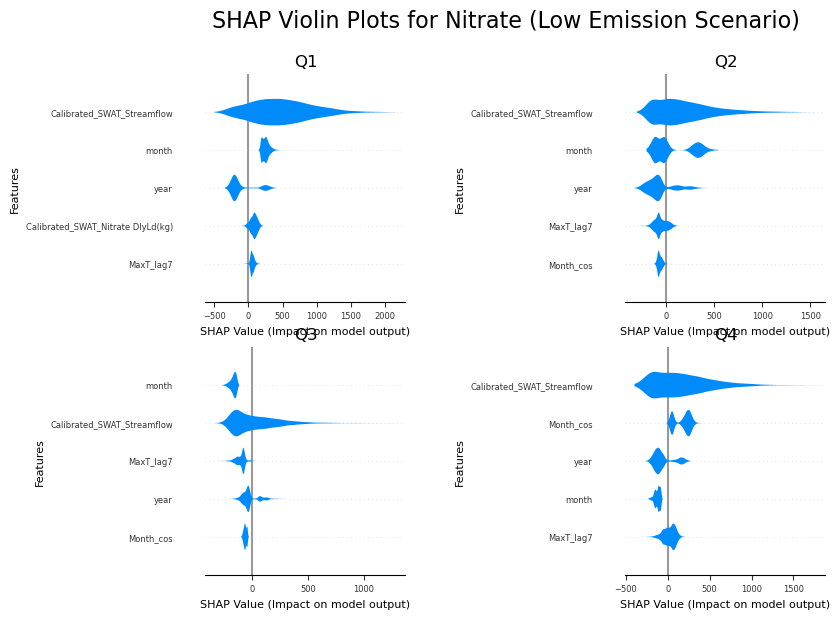

In [ ]:

fig, axs = plt.subplots(2, 2, figsize=(80, 30))
fig.subplots_adjust(hspace=0.2, wspace=1.1)

# Function to plot SHAP violin and suppress individual display
def plot_shap_violin(shap_values, feature_names, ax, title):
    plt.sca(ax)  # Set the current axis
    shap.plots.violin(
        shap_values, feature_names=feature_names,plot_size=1, show=False, max_display=5
    )  # Generate SHAP plot
    plt.title(title)
    plt.xlabel("Feature Value")
    plt.ylabel("SHAP Value")
    # plt.close()  # Close the individual plot to suppress display
# fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot SHAP violin plots for each season
plot_shap_violin(
    nitrate_shap_le_jfm[nitrate_features].to_numpy(), nitrate_features, axs[0, 0], "Q1"
)
plot_shap_violin(
    nitrate_shap_le_amj[nitrate_features].to_numpy(), nitrate_features, axs[0, 1], "Q2"
)
plot_shap_violin(
    nitrate_shap_le_jas[nitrate_features].to_numpy(), nitrate_features, axs[1, 0], "Q3"
)
plot_shap_violin(
    nitrate_shap_le_ond[nitrate_features].to_numpy(), nitrate_features, axs[1, 1], "Q4"
)
for ax in axs.flat:
    ax.tick_params(axis="x", labelsize=6)
    ax.tick_params(axis="y", labelsize=6)
    ax.set_ylabel("Features", fontsize=8)
    ax.set_xlabel("SHAP Value (Impact on model output)", fontsize=8)

# Adjust layout to prevent overlap
# plt.tight_layout()

# Show the combined plot
fig.suptitle("SHAP Violin Plots for Nitrate (Low Emission Scenario)", fontsize=16)
plt.savefig("shap_violin_plots_nitrate_le.png", dpi=600, bbox_inches="tight")
plt.show()

In [ ]:
def plot_shap_violin(shap_values, feature_names, ax, title):
    plt.sca(ax)  # Set the current axis
    shap.plots.violin(
        shap_values, feature_names=feature_names, show=False, max_display=10
    )  # Generate SHAP plot
    plt.title(title)

def shap_violin_seasons(target, emission_scenario):
    shap_values, ensemble_outputs, features = get_shap_analysis(
        emission_scenario, target
    )

    # Split the ensemble data into seasons
    ensemble_jfm = ensemble_outputs[
        (ensemble_outputs["Date"].dt.month == 1)
        | (ensemble_outputs["Date"].dt.month == 2)
        | (ensemble_outputs["Date"].dt.month == 3)
    ]
    ensemble_amj = ensemble_outputs[
        (ensemble_outputs["Date"].dt.month == 4)
        | (ensemble_outputs["Date"].dt.month == 5)
        | (ensemble_outputs["Date"].dt.month == 6)
    ]
    ensemble_jas = ensemble_outputs[
        (ensemble_outputs["Date"].dt.month == 7)
        | (ensemble_outputs["Date"].dt.month == 8)
        | (ensemble_outputs["Date"].dt.month == 9)
    ]
    ensemble_ond = ensemble_outputs[
        (ensemble_outputs["Date"].dt.month == 10)
        | (ensemble_outputs["Date"].dt.month == 11)
        | (ensemble_outputs["Date"].dt.month == 12)
    ]

    # Get the indices for each season
    indices_jfm = ensemble_jfm.index
    indices_amj = ensemble_amj.index
    indices_jas = ensemble_jas.index
    indices_ond = ensemble_ond.index

    # Get the SHAP values for each season
    shap_jfm = shap_values.iloc[indices_jfm]
    shap_amj = shap_values.iloc[indices_amj]
    shap_jas = shap_values.iloc[indices_jas]
    shap_ond = shap_values.iloc[indices_ond]

    # Create a figure with subplots
    fig, axs = plt.subplots(2, 2)#, figsize=(12, 8))
    fig.subplots_adjust(hspace=0.6, wspace=1.7)

    # Plot SHAP violin plots for each season
    plot_shap_violin(
        shap_jfm[features].to_numpy(), features, axs[0, 0], "Q1"
    )
    plot_shap_violin(
        shap_amj[features].to_numpy(), features, axs[0, 1], "Q2"
    )
    plot_shap_violin(
        shap_jas[features].to_numpy(), features, axs[1, 0], "Q3"
    )
    plot_shap_violin(
        shap_ond[features].to_numpy(), features, axs[1, 1], "Q4"
    )

    for ax in axs.flat:
        ax.tick_params(axis="x", labelsize=7)
        ax.tick_params(axis="y", labelsize=7)
        ax.set_xlabel("Impact on model output", fontsize=7)

    # Adjust layout to prevent overlap
    # plt.tight_layout()

    # Show the combined plot
    fig.suptitle(f"SHAP Violin Plots for {target} ({emission_scenario} Scenario)", fontsize=10, y=1.05)
    plt.savefig(f"figs/shap_violin_plots_{target}_{emission_scenario}.png", dpi=600, bbox_inches="tight")
    plt.show()


/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_51192/571335109.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_51192/571335109.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ensemble_df = ensemble_df.groupby("Date").mean().reset_index()


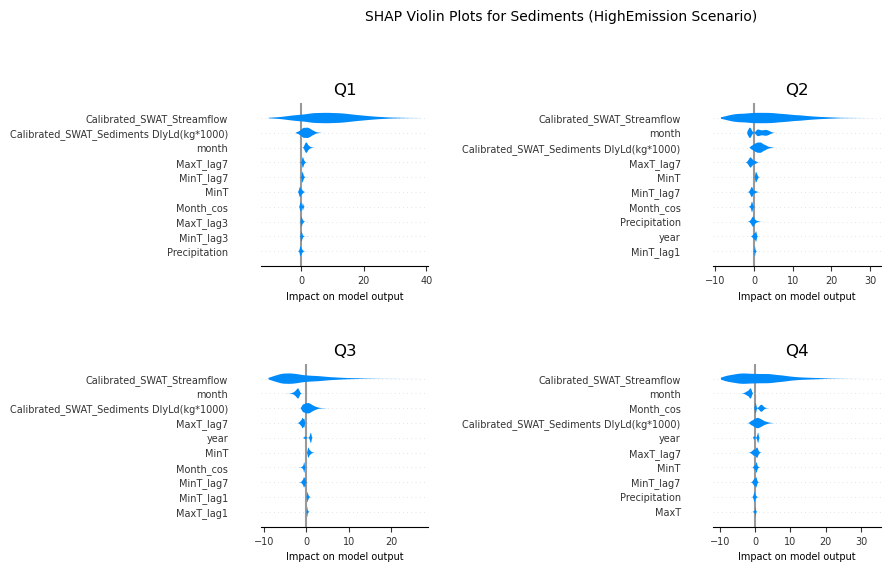

In [ ]:
shap_violin_seasons("Sediments", "HighEmission")


/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_51192/571335109.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_51192/571335109.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ensemble_df = ensemble_df.groupby("Date").mean().reset_index()


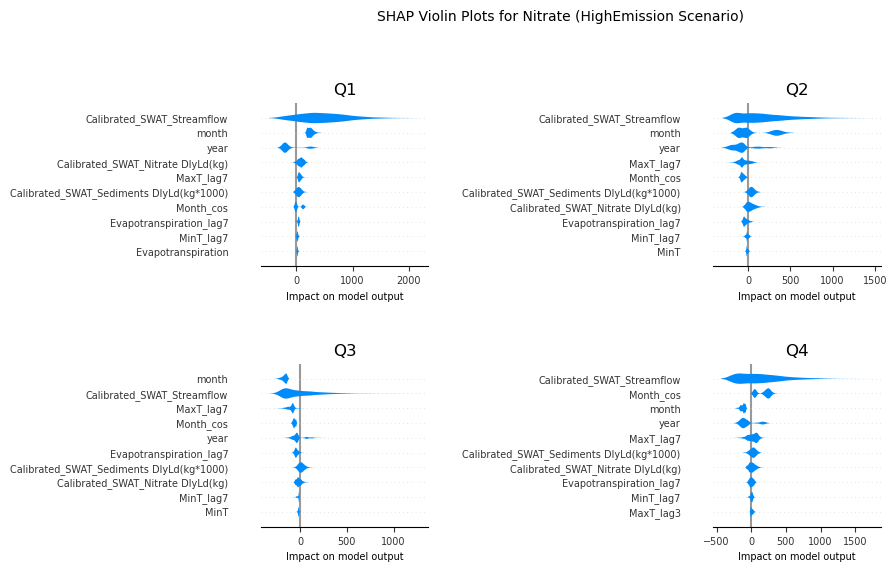

/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_51192/571335109.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_51192/571335109.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ensemble_df = ensemble_df.groupby("Date").mean().reset_index()


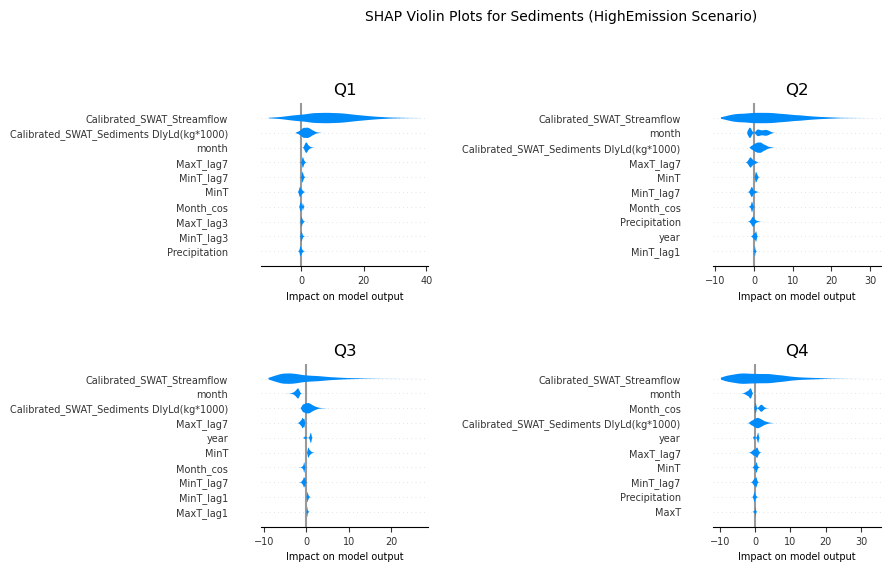

/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_51192/571335109.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_51192/571335109.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ensemble_df = ensemble_df.groupby("Date").mean().reset_index()


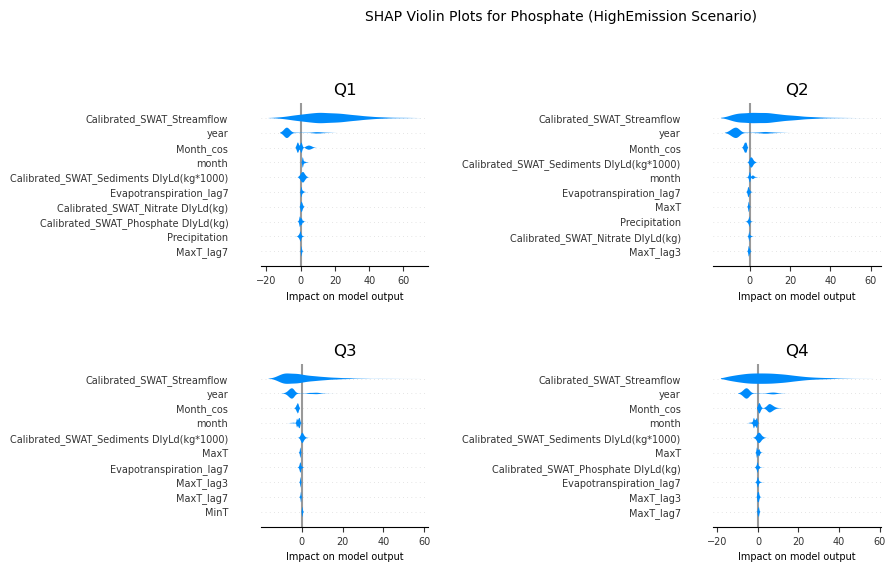

/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_51192/571335109.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_51192/571335109.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ensemble_df = ensemble_df.groupby("Date").mean().reset_index()


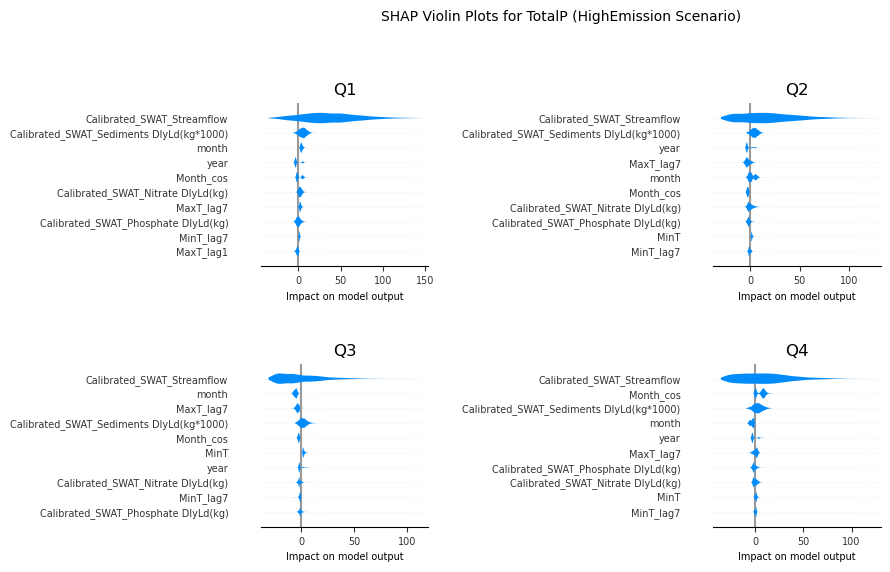

In [ ]:
shap_violin_seasons("Nitrate", "HighEmission")
shap_violin_seasons("Sediments", "HighEmission")
shap_violin_seasons("Phosphate", "HighEmission")
shap_violin_seasons("TotalP", "HighEmission")